# Group 31: Placement Prediction

**Group members:** Jeff Hu, Daniel Truong, Longyi Yuan, Mohith Baskaran

**Course:** STAT 301

**Date:** April 7th

In [2]:
# Main developer: Longyi
# Contributors: Jeff, Daniel, Mohith

library(tidyverse)
library(repr)
library(infer)
library(dplyr)
library(cowplot)
library(broom)
library(rsample)
library(MASS)      
library(caret)
library(car)

# I. Introduction:

Let’s set the scene: securing a job placement has always been a big concern for many students, especially in a climate where everyone’s hustling hard. Colleges encourage skill-building activities (like internships, projects, and workshops), emphasizing both hard skills and soft skills, hoping these experiences increase the odds of landing a job. Naturally, we can’t overlook traditional academic performance measures such as CGPA, SSC, and HSC marks. And that’s where our dataset steps in, providing detailed info on academic achievements, skill-enhancement activities, personal attributes (like AptitudeTestScore and SoftSkillRating), and whether or not a student got placed.

With so many facets playing into job outcomes, we want to explore whether a particular factor, like CGPA, internship count, or extracurricular involvement is actually associated with better placement prospects. This question is important not just for students to plan their college activities, but also for educational institutions looking to refine their training programs.

**Research Question**

**Can academic achievements, skill-enhancement activities, and personal attributes predict a student’s job placement success?**

**Goal:**

- Identify statistically significant predictors of job placement using logistic regression.
  
- Assess the predictive accuracy of the model for supplementary insights.

**Response Variable:** PlacementStatus (binary: Placed or Not Placed).

**Predictor Variables of Interest:**

- **Academic Achievements:**

    - CGPA (cumulative GPA)
      
    - SSC_Marks (senior secondary marks)
 
      
    - HSC_Marks (higher secondary marks)

- **Skill-Enhancement Activities:**

    - Internships (number completed)
    
    - Projects (number completed)

    - Workshops/Certifications (number attended)

- **Personal Attributes:**

    - AptitudeTestScore (quantitative/logic score)
      
    - SoftSkillRating (communication skills rating)

    - ExtracurricularActivities (participation: Yes/No)
Primary Focus: Inference
The main objective is to understand and interpret the associations between predictors and placement outcomes. While predictive performance (e.g., accuracy, AUC-ROC) is explored, the emphasis remains on identifying which factors most strongly influence placement likelihood. This prioritizes actionable insights for students and educators over pure predictive power.

# II. Methods and results:

## a) Data

### Data description

Below is a summary table of the dataset variables: The dataset contains 10000 observations and 11 variables, each representing an individual student. The variables capture a range of academic, personal, and training-related characteristics that may influence whether a student is placed or not. The table below describes all the varlables in the dataset.

In [ ]:
# Main developer: Daniel 

summary_table <- data.frame(
  Variable = c(
    "CGPA", "Internships", "Projects", "Workshops/Certifications",
    "ApptitudeTestScore", "SoftSkillrating", "ExtraCurricularActivities",
    "PlacementTraining", "SSC", "HSC", "PlacementStatus"
  ),
  Type = c(
    "Numeric", "Integer", "Integer", "Integer",
    "Numeric", "Numeric", "Integer",
    "Binary (0 = No, 1 = Yes)", "Numeric", "Numeric", "Categorical"
  ),
  Description = c(
    "Overall grades achieved by the student",
    "Number of internships a student has done",
    "Number of projects a student has completed",
    "Online courses taken to upskill themselves",
    "Score from aptitude tests (Quant & logic)",
    "Soft skill (e.g., communication) rating",
    "Involvement in non-academic activities",
    "Whether placement training was taken",
    "Senior Secondary marks",
    "Higher Secondary marks",
    "Target variable: Placed or Not Placed"
  )
)
summary_table

Variable,Type,Description
<chr>,<chr>,<chr>
CGPA,Numeric,Overall grades achieved by the student
Internships,Integer,Number of internships a student has done
Projects,Integer,Number of projects a student has completed
Workshops/Certifications,Integer,Online courses taken to upskill themselves
ApptitudeTestScore,Numeric,Score from aptitude tests (Quant & logic)
SoftSkillrating,Numeric,"Soft skill (e.g., communication) rating"
ExtraCurricularActivities,Integer,Involvement in non-academic activities
PlacementTraining,"Binary (0 = No, 1 = Yes)",Whether placement training was taken
SSC,Numeric,Senior Secondary marks


In [4]:
# Main developer: Longyi

url <- "https://raw.githubusercontent.com/Arcyill/STAT-301-Project/refs/heads/main/placementdata.csv"

placementData <- read.csv(url)

### Source and Information
The dataset used in this analysis is from the Kaggle Placement Prediction Dataset and was collected to study student placement outcomes based on academic performance, training efforts, and personal attributes.

• Data Source: Kaggle

• Collection Method: The dataset consists of 10,000 student records, each with 11 variables capturing academic scores, skill-building activities, and placement status.

• Citation: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data

### Pre-selection

While it may be hard to determine what vairables to drop at this stage, we can drop StudentID because it just a unique identifier for each student, meaning it has no predictive power or meaningful relationship with PlacementStatus. Removing it will prevent unnecessary noise in our analysis and improve model interpretability


In [5]:
# Main developer: Jeff

placementData <- placementData |>
    dplyr::select(-StudentID)

head(placementData)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


### Data cleaning

In [6]:
# Main developer: Longyi

placementData <- placementData |> drop_na()
head(placementData)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


## b) Exploratory Data Analysis (EDA)

### Visualization 1

<<<<<<< local


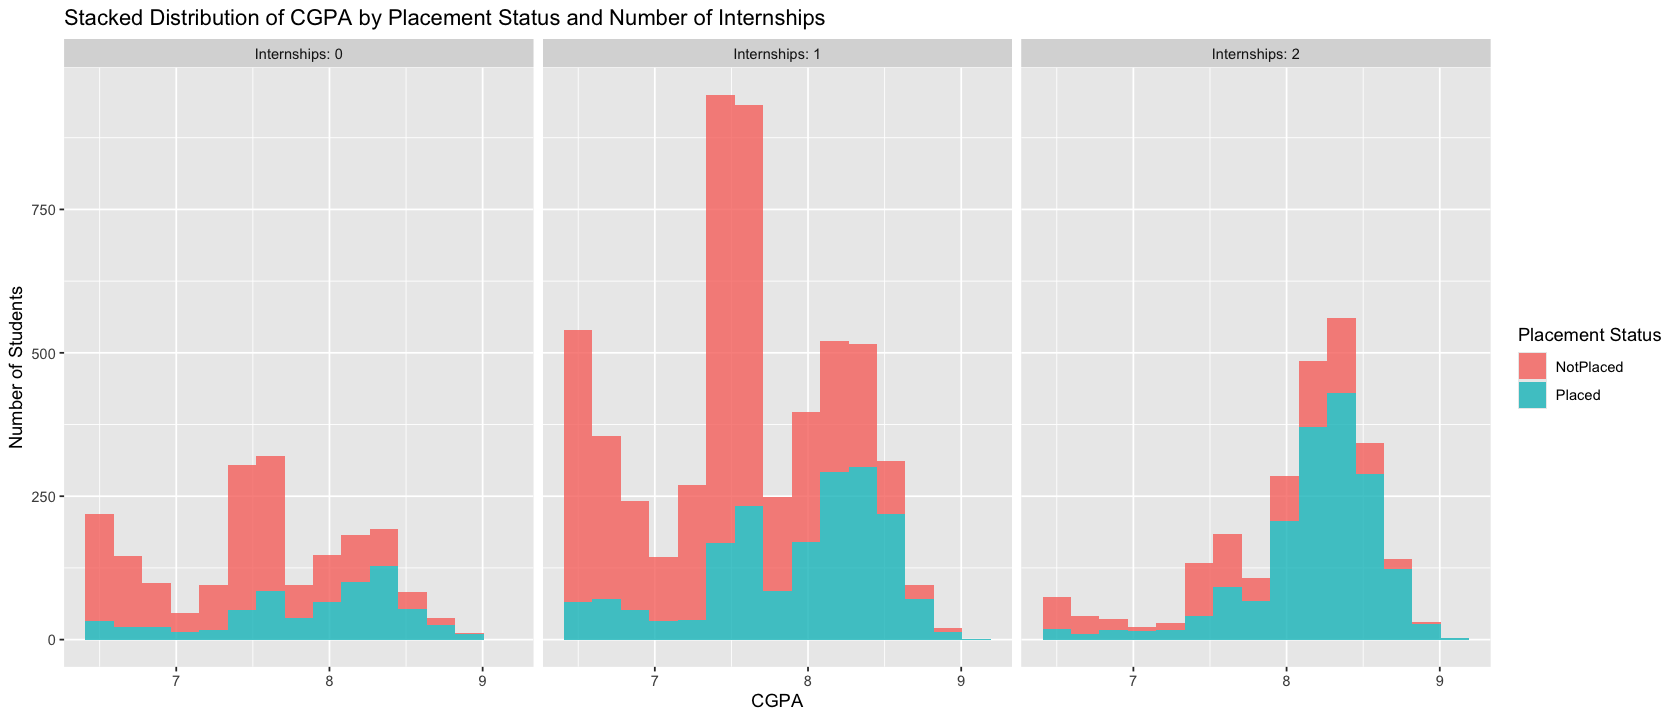

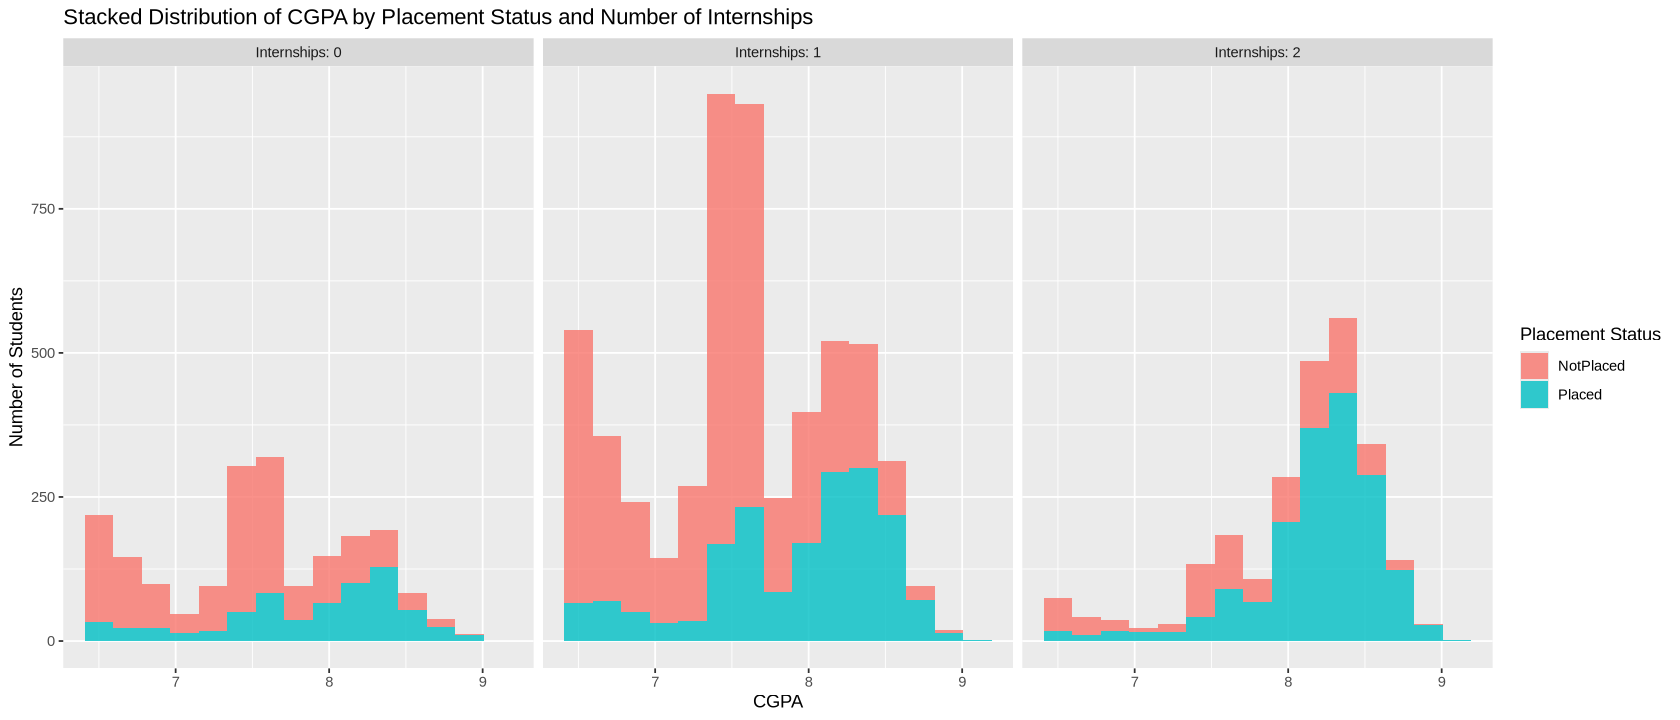

>>>>>>> remote


In [7]:
# Main developer: Longyi

options(repr.plot.width = 14, repr.plot.height = 6) #changing the dimensions of the graph

ggplot(placementData, aes(x = CGPA, fill = PlacementStatus)) + 
  geom_histogram(position = "stack", alpha = 0.8, bins = 15) + #stacked histograms of CGPA filled by PlacementStatus
  facet_wrap(~ Internships, labeller = label_both) + #splitting the plots based on the number of internships.  
  labs( 
    title = "Stacked Distribution of CGPA by Placement Status and Number of Internships",
    x = "CGPA",
    y = "Number of Students",
    fill = "Placement Status" 
  )#Labels

The stacked histograms illustrate the distribution of students' CGPA, differentiated by Placement Status (using colour) and separated by the number of internships. From the plot, students with higher CGPA tend to secure placements more frequently, especially noticeable among students who, despite having no internships, have more placements than not placed. The plot also reveals that students with two internships show a higher likelihood of placement, even at somewhat lower CGPAs. Conversely, there's little visible distinction between students with zero or one internship in terms of CGPA distribution or placement outcomes.

There is also a noticeable trend in CGPA distribution based on internship experience. This could be because students who actively pursue internships tend to maintain higher CGPAs overall or vice versa, as evident in the fact that students with 2 internships exhibit a distribution that's left-skewed (higher CGPAs), whereas students with 0 internships exhibit a right-skewed distribution (moderate to lower CGPAs).

This visualization is relevant because it helps us explore the relationship between academic performance, practical experience, and placement success. The plot highlights that CGPA is a key factor in placement but also shows that internships may influence placement likelihood independently of GPA. By faceting the histogram by internship experience, we can observe how CGPA distributions shift based on the number of internships, revealing that students with more internships tend to have both higher CGPAs and higher placement rates. This is crucial for the inference question stated earlier, as it suggests that both academic achievement and internship experience may be important in securing a job placement.

This is important because it means that excluding either one of these variables could lead to omitted variable bias. For example, if we were to exclude internships from our analysis, our model might overestimate the impact of CGPA on placement success, failing to account for the fact that internships provide an alternative pathway to placement, even for students with moderate CGPAs. On the other hand, omitting CGPA could lead to overstating the effect of internships, ignoring the clear trend that students with higher GPAs are generally more likely to be placed, regardless of internship experience. Therefore, our model should include both CGPA and internships at the very least.

### Visualization 2

The function in R to fit a logistic regression requires either a numerical response (0 and 1) or a `factor`, with two levels (note that R stores factors as integers). 

Mathematically, we have to construct a binary response $Y_i$ that flags the successes for a given event of interest: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is Placed},\\
0 \; \; \; \; 	\mbox{if the $i$th observation is NotPlaced}
\end{cases}
$$

Therefore, we will change PlacementStatus with values consisting of 1s and 0s. 

In [8]:
# Main developer: Jeff
# Contributors: Longyi

placementData <- placementData %>%
#We will do the same with other binary data
        mutate(ExtracurricularActivities = if_else(ExtracurricularActivities == "Yes", 1, 0),       
        PlacementTraining = if_else(PlacementTraining == "Yes", 1, 0),
        PlacementStatus = if_else(PlacementStatus == "Placed", 1, 0))
head(placementData)


,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1
6,7.0,0,2,2,71,4.2,1,0,55,66,0


<<<<<<< local


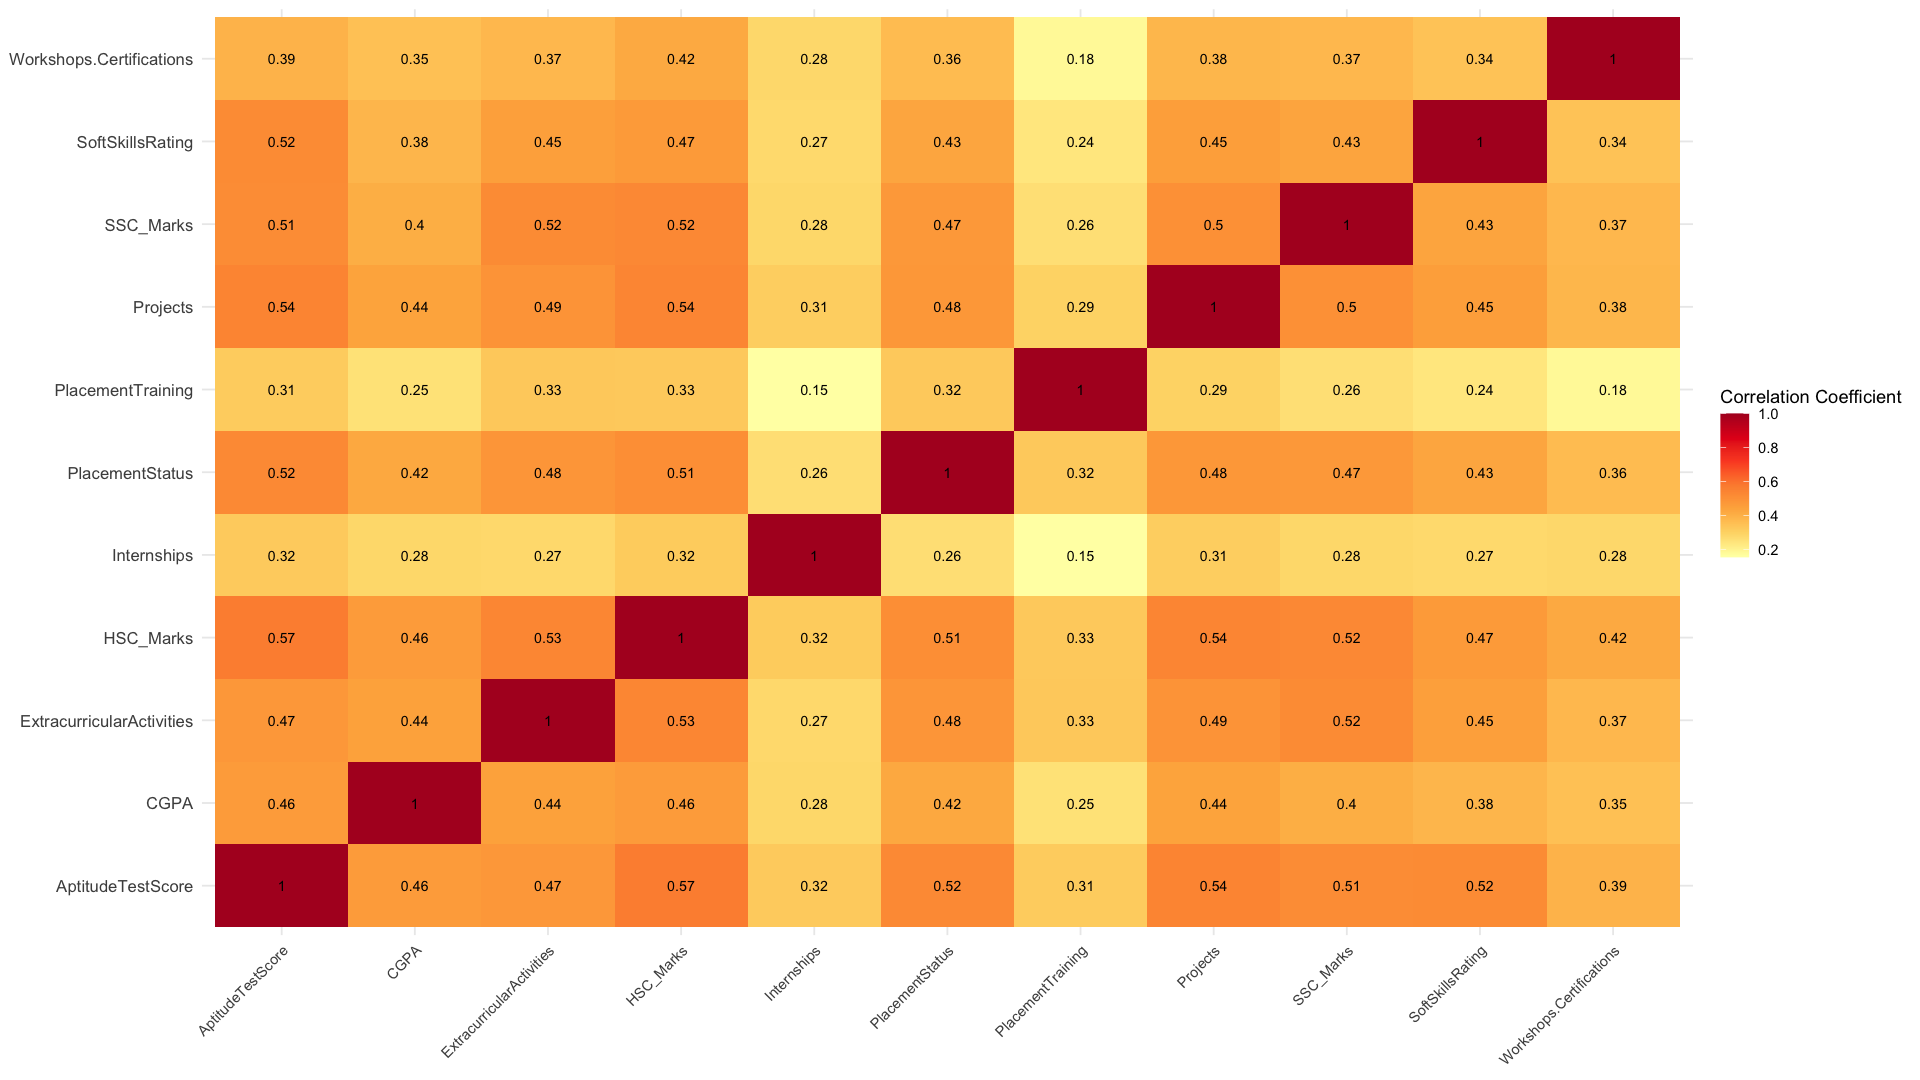

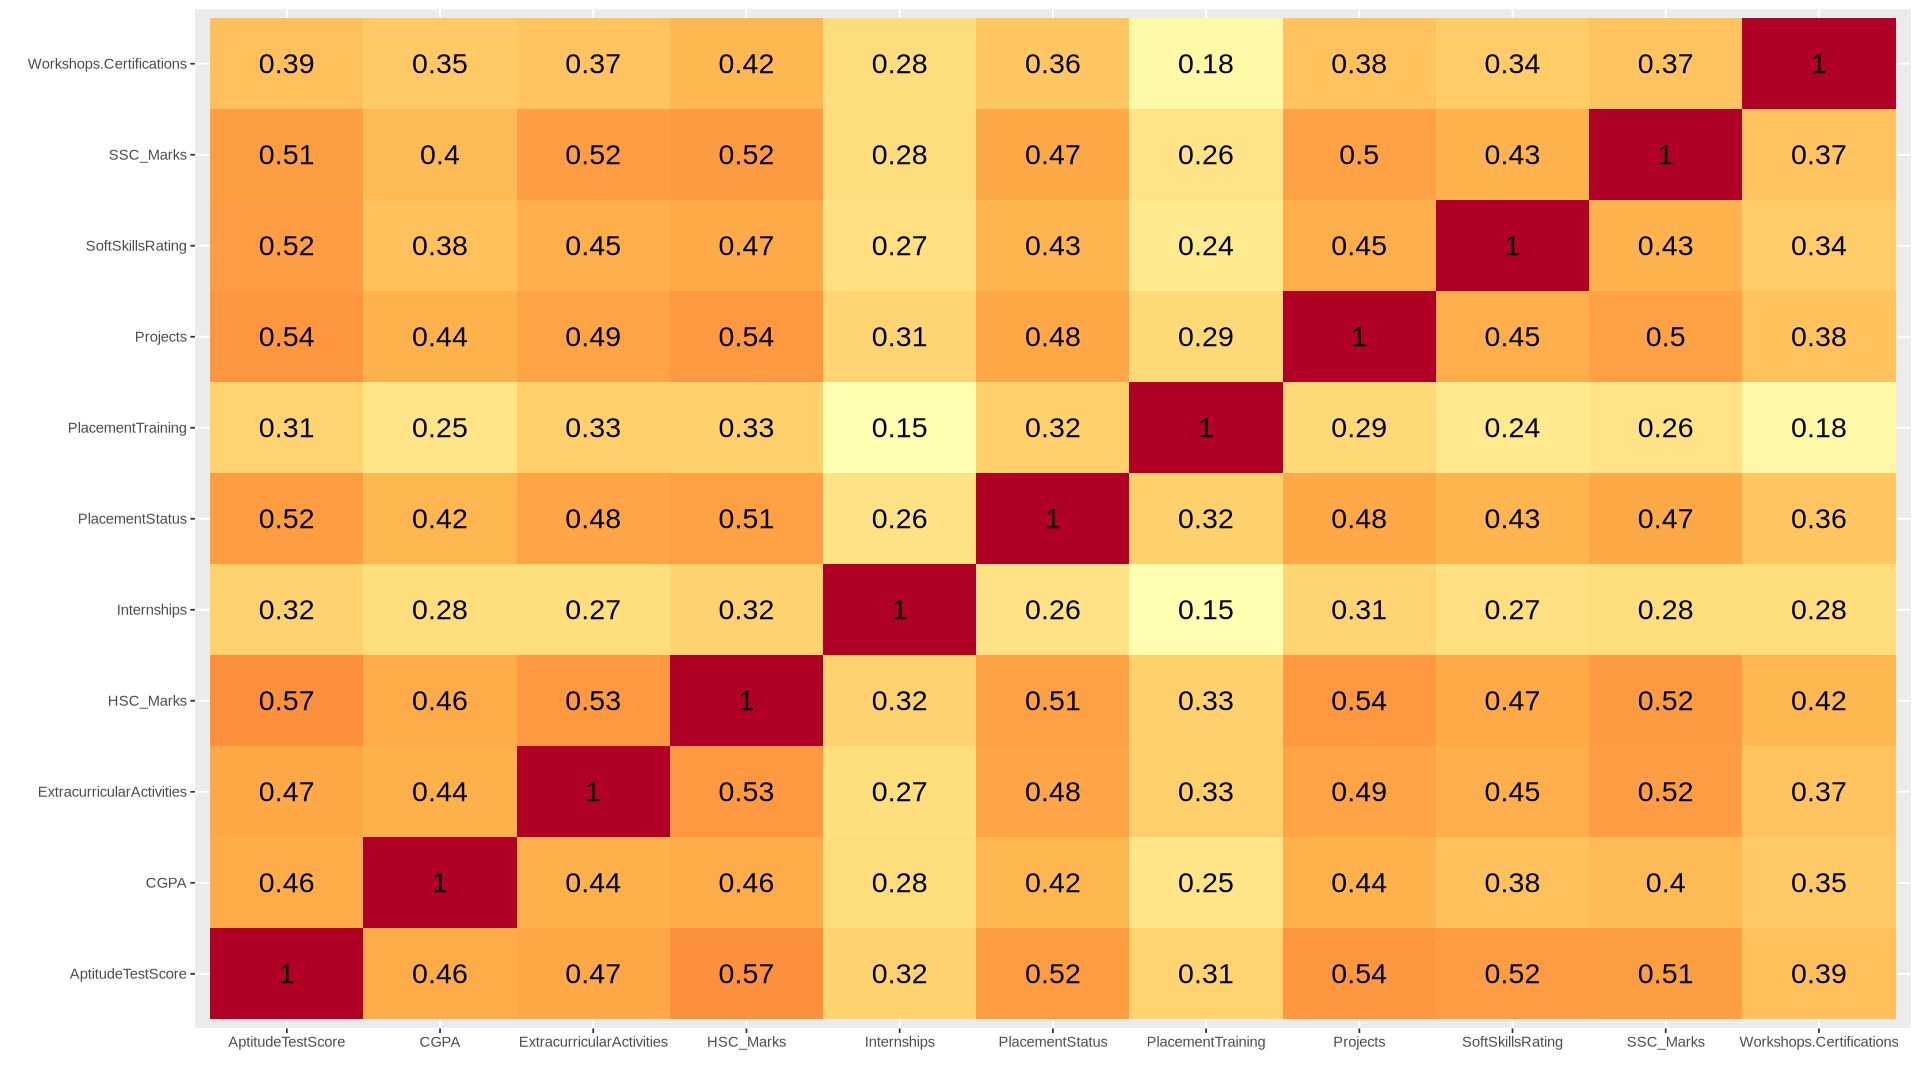

>>>>>>> remote


In [9]:
# Main developer: Jeff
# Contributors: Longyi, Mohith

options(repr.plot.width = 16, repr.plot.height = 9)

data_heatgraph <- placementData |> 
  cor() |>  #Compute correlation matrix for all numeric variables
  as.data.frame() |> # Convert matrix to dataframe 
  rownames_to_column(var = "var1") |>
  pivot_longer(-var1, names_to = "var2", values_to = "corr") 


heatgraph <- data_heatgraph |> 
  ggplot(aes(x = var1, y = var2)) +
  geom_tile(aes(fill = corr)) +
  scale_fill_distiller(
    name = "Correlation Coefficient",
    palette = "YlOrRd",
    direction = 1
  ) +
  geom_text(
    aes(label = round(corr, 2)),
    color = "black",
    size = 3
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 10),
    legend.position = "right"
  ) +
  labs(x = NULL, y = NULL)

heatgraph

The heatmap provides a quick and intuitive overview of which predictors are more strongly associated with placement outcomes, helping to prioritize variables for further analysis. Notably, the heatmap shows that the strongest relationships with PlacementStatus, are AptitudeTestScore (0.52) and HSC_Marks (0.51), suggesting that higher aptitude test scores and high school academic performance are closely linked to successful job placements. Other notable factors include Projects (0.48), SSC_Marks (0.47), ExtracurricularActivities (0.48), SoftSkillsRating (0.43), and CGPA (0.42), each demonstrating moderate positive relationships with placement outcomes. On the other hand, factors like Internships (0.26), PlacementTraining (0.32), and Workshops.Certifications (0.36) have weaker correlations, suggesting that while they're still beneficial, they may not be primary predictors of placement success.

The graph also suggests that possible multicollinearity may be present between the predictors. For example, variables like HSC_Marks, SSC_Marks, and AptitudeTestScore show moderate correlations with each other (eg. above 0.5). However, a correlation of just above 0.5 is not enough to suggest multicollinearity between the variables, and VIF will be used later on to determine whether multicollinearity is present.

## c) Methods: Plan

Before fitting the model, the data is first split into training and testing sets using stratified sampling on PlacementStatus. All model fitting and variable selection are done only using the training set to avoid overfitting and ensure valid model evaluation. 

Next, variable selection using stepAIC will be performed to only select the relevant variables. Specifically, forward selection is being used because we believe a lot of students are busy balancing multiple responsibilities and time constraints often make it hard to excel in all areas. By building the model incrementally, only the most informative predictors are included, reducing complexity and improving interpretability. 


The model used to address the research question will be logistic regression. This method will model the binary outcome of placement status (placed or not placed based on the variables selected. Logistic regression is appropriate because placement status is binary. Logistic regression models the probability of placement and allows for the interpretation of how each predictor influences this probability through odd ratios.

There are several assumptions:

- Observations of placement outcomes for each student must be independent of each other
- Predictors must have a linear relationship with the log odds of the placement outcome.
- Predictor variables are not highly correlated with one another.
- There are no significant outliers that may disproportionately impact the parameter estimates

Potential Limitations:

- One limitation is that the assumption of linearity between predictors and log odds might not hold, requiring transformations or additional modelling techniques.
- Another limitation is that significant outliers can heavily bias the coefficients and degrade the model performance. 


Once the final logistic regression is fit using the training set, model comparison using ANOVA, and diagnostics such as Variance Inflation Factor (VIF) to detect multicollinearity, will be performed using the training data only, as they are part of the model development process.

If it has passed diagnostic checks, its performance will be evaluated on the testing set. Specifically, predictions will be generated on test data, and a confusion matrix and classification accuracy will be used to assess how well the model generalizes to unseen data. These metric will be used to provide insight into the model's predictive ability. 


In [10]:
# Main developer: Jeff

set.seed(123) # we set a seed to make our code reproductible 
placementData_split <- initial_split(placementData, prop = 0.7, strata = PlacementStatus)
#splitting the data into training and testing
placementData_training <- training(placementData_split)
placementData_testing <- testing(placementData_split)
head(placementData_training)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.0,0,2,2,71,4.2,1,0,55,66,0
4,7.7,2,1,0,85,3.5,1,1,59,72,0
5,7.7,1,1,1,74,4.6,0,1,63,73,0
6,7.4,0,2,1,78,4.4,0,0,63,66,0


In [11]:
# Main developer: Jeff

null_model <- glm(PlacementStatus ~ 1, data = placementData_training, family = 'binomial')
full_model <- glm(PlacementStatus ~ ., data = placementData_training, family = 'binomial')
step_model <- MASS::stepAIC(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")
summary(step_model)

Start:  AIC=9523.06
PlacementStatus ~ 1

                            Df Deviance    AIC
+ AptitudeTestScore          1   7342.8 7346.8
+ HSC_Marks                  1   7625.4 7629.4
+ ExtracurricularActivities  1   7767.4 7771.4
+ Projects                   1   7823.8 7827.8
+ SSC_Marks                  1   7827.0 7831.0
+ SoftSkillsRating           1   8087.7 8091.7
+ CGPA                       1   8100.7 8104.7
+ Workshops.Certifications   1   8632.3 8636.3
+ PlacementTraining          1   8771.9 8775.9
+ Internships                1   9054.9 9058.9
<none>                           9521.1 9523.1

Step:  AIC=7346.77
PlacementStatus ~ AptitudeTestScore

                            Df Deviance    AIC
+ ExtracurricularActivities  1   6710.2 6716.2
+ SSC_Marks                  1   6840.9 6846.9
+ HSC_Marks                  1   6857.0 6863.0
+ Projects                   1   6921.4 6927.4
+ CGPA                       1   6939.3 6945.3
+ SoftSkillsRating           1   7025.3 7031.3
+ Placeme


Call:
glm(formula = PlacementStatus ~ AptitudeTestScore + ExtracurricularActivities + 
    SSC_Marks + PlacementTraining + CGPA + SoftSkillsRating + 
    Projects + HSC_Marks + Workshops.Certifications, family = "binomial", 
    data = placementData_training)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -18.252114   0.632117 -28.875  < 2e-16 ***
AptitudeTestScore           0.069434   0.005570  12.465  < 2e-16 ***
ExtracurricularActivities   0.730853   0.080437   9.086  < 2e-16 ***
SSC_Marks                   0.033101   0.003748   8.832  < 2e-16 ***
PlacementTraining           0.887372   0.085136  10.423  < 2e-16 ***
CGPA                        0.458496   0.060208   7.615 2.63e-14 ***
SoftSkillsRating            0.651028   0.100664   6.467 9.97e-11 ***
Projects                    0.272739   0.044543   6.123 9.18e-10 ***
HSC_Marks                   0.023426   0.004575   5.121 3.04e-07 ***
Workshops.Certifications    0.1100

The stepwise AIC selection process helped find the most important factors that influence whether a student gets placed. When we added AptitudeTestScore, the AIC dropped significantly from 9523.1 to 7346.77, indicating a huge improvement. When we added ExtracurricularActivites, AIC again shows a drop to 6716.15，showing that extracurricular activities adds substantial predictive value. The rest are also added in the following order: SSC_Marks, PlacementTraining, CGPA, SoftSkillsRating, Projects, HSC_Marks, Workshop.Certifications. However, Internships were never included because it never reduced the AIC enough to justify its complexity.

Furthermore, the model is much better at predicting placement outcomes compared to using no predictors, as shown by the significant drop in AIC (from 9523.06 to 6085.6) and residual deviance (from 9521.1 to 6065.6). Evidently, the selected predictors significantly improve the fit of the model. 

In [12]:
# Main developer: Jeff
# Contributors: Daniel

final_model <- glm(PlacementStatus ~ AptitudeTestScore + ExtracurricularActivities + SSC_Marks + PlacementTraining + CGPA + SoftSkillsRating + Projects + HSC_Marks + Workshops.Certifications, 
                   data = placementData_training, family = 'binomial') #fitting the model with the slected predictors
summary(final_model)
tidy(final_model, conf.int = TRUE, exponentiate = TRUE) #exponentiating the coeffcients for easier interpretation


Call:
glm(formula = PlacementStatus ~ AptitudeTestScore + ExtracurricularActivities + 
    SSC_Marks + PlacementTraining + CGPA + SoftSkillsRating + 
    Projects + HSC_Marks + Workshops.Certifications, family = "binomial", 
    data = placementData_training)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -18.252114   0.632117 -28.875  < 2e-16 ***
AptitudeTestScore           0.069434   0.005570  12.465  < 2e-16 ***
ExtracurricularActivities   0.730853   0.080437   9.086  < 2e-16 ***
SSC_Marks                   0.033101   0.003748   8.832  < 2e-16 ***
PlacementTraining           0.887372   0.085136  10.423  < 2e-16 ***
CGPA                        0.458496   0.060208   7.615 2.63e-14 ***
SoftSkillsRating            0.651028   0.100664   6.467 9.97e-11 ***
Projects                    0.272739   0.044543   6.123 9.18e-10 ***
HSC_Marks                   0.023426   0.004575   5.121 3.04e-07 ***
Workshops.Certifications    0.1100

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.183607e-08,0.632116855,-28.874589,2.489751e-183,3.390612e-09,4.041745e-08
AptitudeTestScore,1.071901e+00,0.005570198,12.465275,1.154728e-35,1.060296e+00,1.083706e+00
ExtracurricularActivities,2.076852e+00,0.080437500,9.085975,1.027736e-19,1.774123e+00,2.431925e+00
SSC_Marks,1.033655e+00,0.003747912,8.831841,1.029664e-18,1.026093e+00,1.041282e+00
PlacementTraining,2.428739e+00,0.085136252,10.422966,1.947831e-25,2.057181e+00,2.872425e+00
CGPA,1.581694e+00,0.060207701,7.615246,2.631887e-14,1.405964e+00,1.780300e+00
SoftSkillsRating,1.917511e+00,0.100663564,6.467367,9.972557e-11,1.574749e+00,2.336759e+00
Projects,1.313557e+00,0.044543082,6.123040,9.180669e-10,1.203603e+00,1.433268e+00
HSC_Marks,1.023703e+00,0.004574667,5.120883,3.041078e-07,1.014556e+00,1.032917e+00


All predictors in the final logistic regression model are statistically significant at a confidence level of 95% and positively associated with placement. However, it is worth noting that some have stronger effects than others. Notably, a unit increase in PlacementTraining is associated with an increase in PlacementStatus by a factor of 2.43. Similarly, a unit increase in ExtracurricularActivities is associated with an increase in PlacementStatus by a factor of 2.08, and a unit increase in SoftSkillsRating is associated with an increase in PlacementStatus by a factor of 1.92. Smaller but still meaningful effects are observed for CGPA (a factor of 1.58), Projects (a factor of 1.31), Workshops.Certifications (a factor of 1.12), AptitudeTestScore (a factor of 1.07), SSC_Marks (a factor of 1.03), and HSC_Marks (a factor of 1.02). Overall, this suggests that students may benefit from not only maintaining strong academic records but also actively engaging in soft skill development and practical experiences to enhance their placement prospects.



In [ ]:
# Main developer: Daniel

# Confusion Matrix
predictions <- predict(final_model, placementData_testing, type = "response") #generate predicted probabilities for the test set
predicted_classes <- ifelse(predictions > 0.5, 1, 0) #Convert probability to (1 = Placed, 0 = NotPlaced
confusionMatrix(factor(predicted_classes), factor(placementData_testing$PlacementStatus)) #Creating the confusion Matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1426  283
         1  315  977
                                         
               Accuracy : 0.8007         
                 95% CI : (0.786, 0.8149)
    No Information Rate : 0.5801         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.5924         
                                         
 Mcnemar's Test P-Value : 0.2049         
                                         
            Sensitivity : 0.8191         
            Specificity : 0.7754         
         Pos Pred Value : 0.8344         
         Neg Pred Value : 0.7562         
             Prevalence : 0.5801         
         Detection Rate : 0.4752         
   Detection Prevalence : 0.5695         
      Balanced Accuracy : 0.7972         
                                         
       'Positive' Class : 0              
                                         

Looking at the Confusion Matrix, we can see that the Type 1 Error Rate is (315/(215+1426)) = 0.181. This means that 18.1% of studnets who were not placed were incorrectly predicted to be placed. Meanwhile the Type 2 error rate is $\frac{283}{(283+977)} = 0.225$. This indicates that that 22.5% of students who were actually placed were predicted to not be placed. On a positive note, the accuracy of the model is $\frac{977+1426}{3001} = 0.801$, which is roughly about 80.1%. This means that the model correctly cassified 80.2% of the test observations. 

Looking at sensitivity (also called the true positive rate), we get 0.8191, which means the model correctly identifies 81.9% of the students who were not placed. This is important if you’re trying to understand who might be at risk of not getting a job and need support. The specificity is 0.7754, meaning the model correctly predicts 77.5% of the students who were placed. This reflects how well the model captures successful placements.

In [ ]:
# Main developer: Jeff

#VIF and ANOVA
vif(final_model)
anova(null_model,final_model, test = "Chisq")

AptitudeTestScore ExtracurricularActivities                 SSC_Marks 
                 1.368114                  1.278274                  1.283565 
        PlacementTraining                      CGPA          SoftSkillsRating 
                 1.022858                  1.206771                  1.248062 
                 Projects                 HSC_Marks  Workshops.Certifications 
                 1.328397                  1.466622                  1.184226

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6998,9521.058,NA,NA,NA
2,6989,6065.625,9,3455.433,0


The VIF value for all predictors is roughly between 1 to 2 and leans towards 1. This means that multicollinearity is not a concern, and the model's coefficient estimates are stable and reliable

When comparing the null model to the final model, we see our residual drop from 9521.058 to 6065.625, which is a huge improvement. This indicates that the full model fits the data significantly better than the null model, and the 9 added predictors jointly explain a large portion of the variability in placement outcomes. 

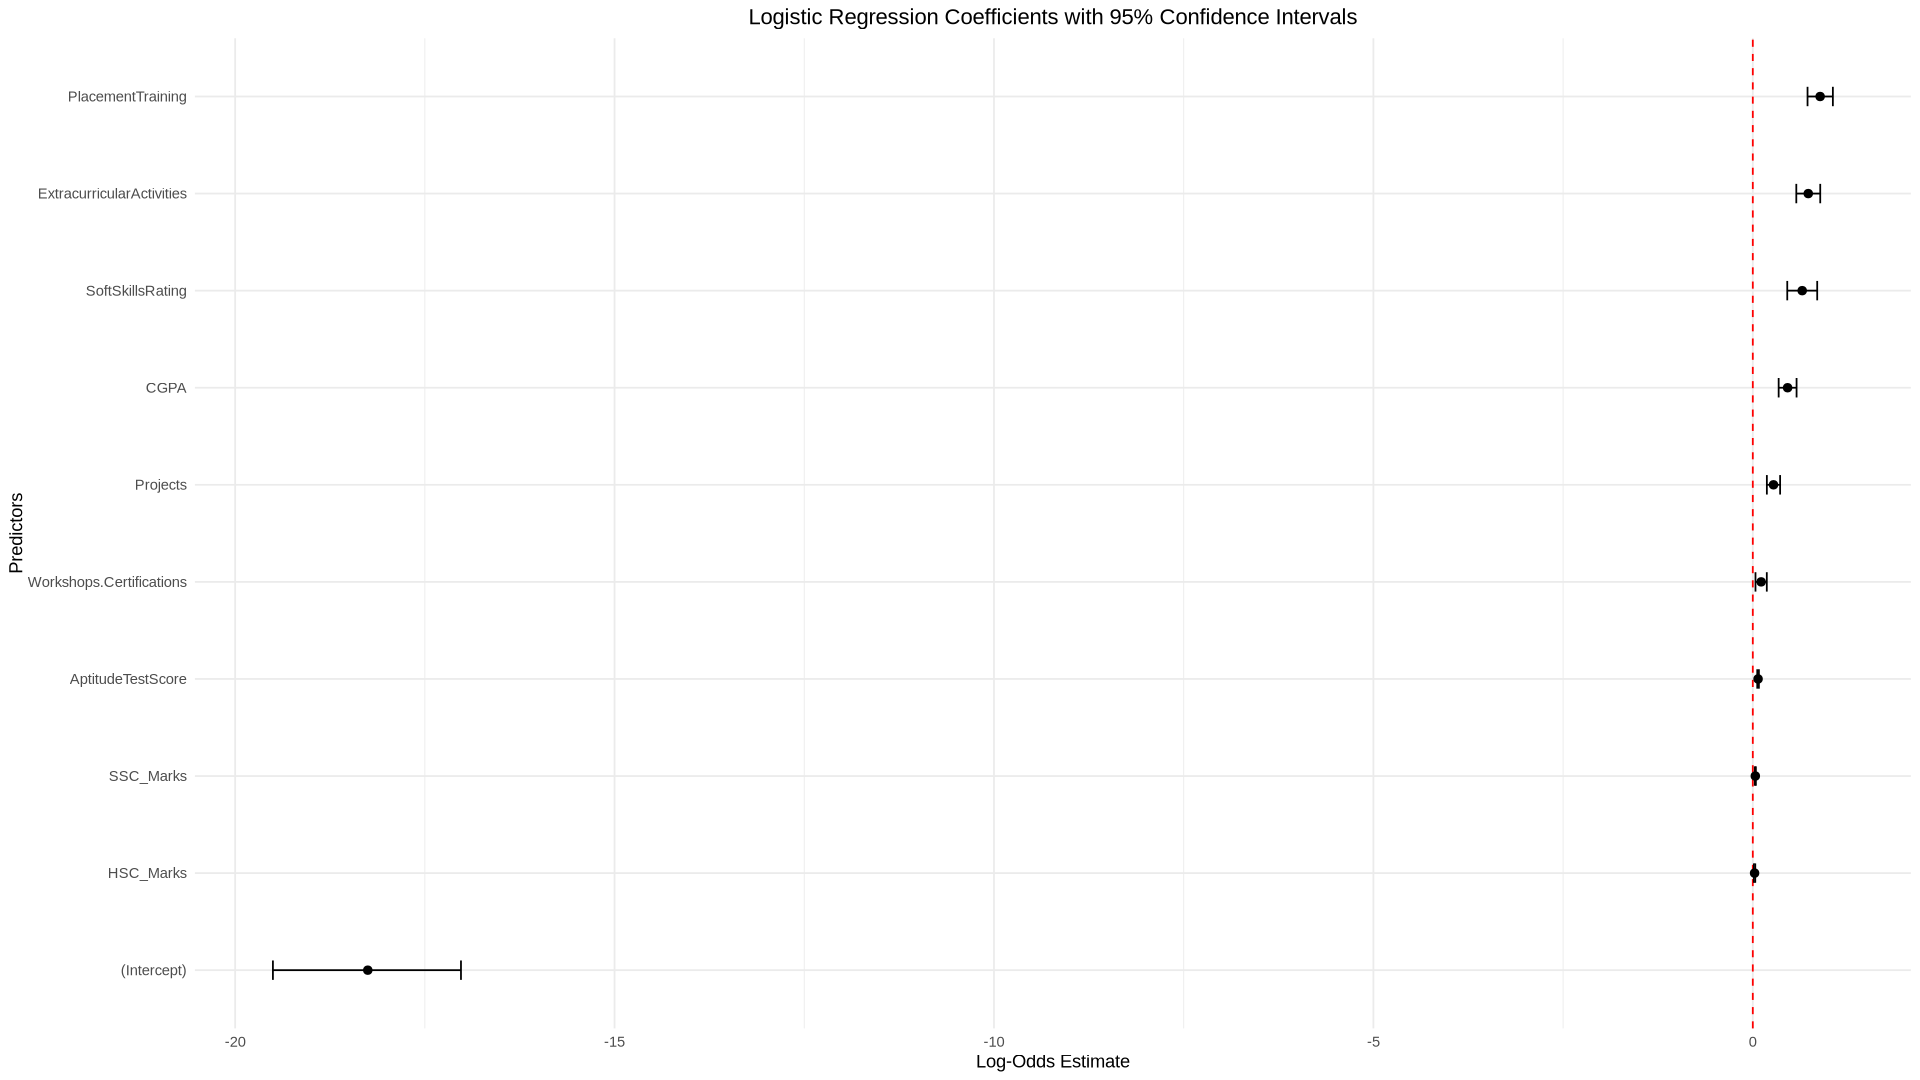

In [19]:
# Main developer: Daniel 
model_coef <- tidy(final_model, conf.int = TRUE, exponentiate = FALSE)  # Use exponentiate = TRUE for odds ratios

# Plot coefficients with 95% CIs
ggplot(model_coef, aes(x = estimate, y = reorder(term, estimate))) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
  geom_point(size = 2) +
  geom_errorbar(aes(xmin = conf.low, xmax = conf.high), width = 0.2) +
  labs(
    title = "Logistic Regression Coefficients with 95% Confidence Intervals",
    x = "Log-Odds Estimate",
    y = "Predictors"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

This plot visualizes the log-odds coefficients for each predictor in the model, along with their 95% confidence intervals (CI). The dots represent the estimated effect of each variable on the likelihood of a student being placed, and the horizontal lines show how confident we are about those estimates. The red dashed line at 0 marks the point of no effect—if a CI crosses this line, the predictor is not statistically significant.

From the plot, predictors like PlacementTraining, SoftSkillsRating, ExtracurricularActivities, CGPA, and Projects stand out with large positive coefficients and confidence intervals that are far from zero—these are the strongest and most significant factors associated with placement success. On the other hand, AptitudeTestScore, SSC_Marks, and especially HSC_Marks have coefficients that are very close to zero, with narrow CIs that nearly touch or barely miss the red line. This means that while they are technically statistically significant, their practical influence is weak. In particular, HSC_Marks contributes very little to the prediction and is borderline insignificant.

# III. Discussion:

The goal of this study was to determine whether academic achievements, skill-enhancement activities, and personal attributes can predict a student’s job placement success. Using logistic regression on the training dataset, we developed a model that identified several key predictors significantly associated with placement outcomes. These included Aptitude Test Score, CGPA, number of Projects, Soft Skills Rating, SSC and HSC marks, participation in Extracurricular Activities, Placement Training, and the number of Workshops/Certifications attended.

The coefficient plot with 95% confidence intervals provided a clear visual representation of the impact and statistical significance of each predictor. Predictors such as PlacementTraining, SoftSkillsRating, ExtracurricularActivities, CGPA, and Projects had large positive log-odds estimates with narrow confidence intervals that did not cross zero, confirming their strong and statistically significant influence on placement success. On the other hand, AptitudeTestScore, SSC_Marks, and especially HSC_Marks had very small coefficients, with confidence intervals close to zero. This means that although these academic variables were statistically significant, their practical contribution to predicting placement is minimal. HSC_Marks, in particular, is borderline insignificant, suggesting limited value in using it alone to forecast placement outcomes.

The final model performed well, as it approximately had a 76% accuracy ($\frac{1426 + 977}{1426 + 283 + 315 + 977}$) on the test set. The analysis of the confusion matrix showed a good balance between precision and recall for predicting whether a student would be placed. In addition, the ANOVA test comparing the final model to the null model confirmed a significant improvement, suggesting that the selected predictors offer meaningful insights into placement outcomes.

The results were aligned with expectations, as it showcased that both academic and non-academic factors as influential. However, the strong effect of soft skills, extracurriculars, and training solifies the importance of well-roundedness for students. To further improve the model, exploring interaction effects or incorporating additional variables such as resume quality or interview scores. These findings have practical implications for career services and students alike, emphasizing that success in job placement depends on more than just good grades.